In [14]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [15]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


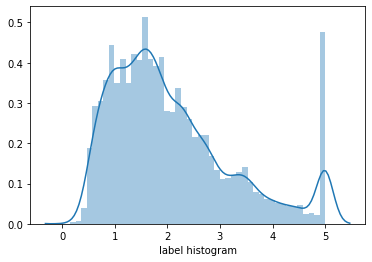

In [16]:
from seaborn import distplot
# make a histogram of the label variable
distplot(y_full, axlabel='label histogram')

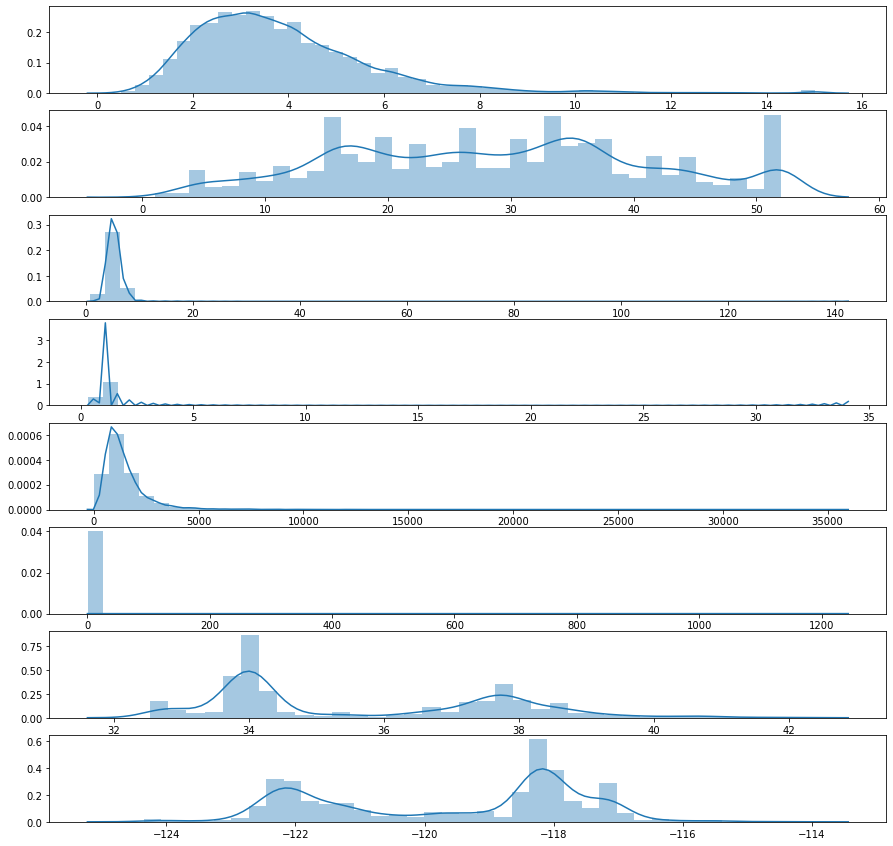

In [17]:
# make histograms of all predictors
from matplotlib import pyplot as plt

fig, axes = plt.subplots(ncols=1, nrows=n_features, figsize=(15,15))

for i, ax in zip(range(n_features), axes.flat): 
    distplot(X_full[:,i], ax=ax)
                 
plt.show()

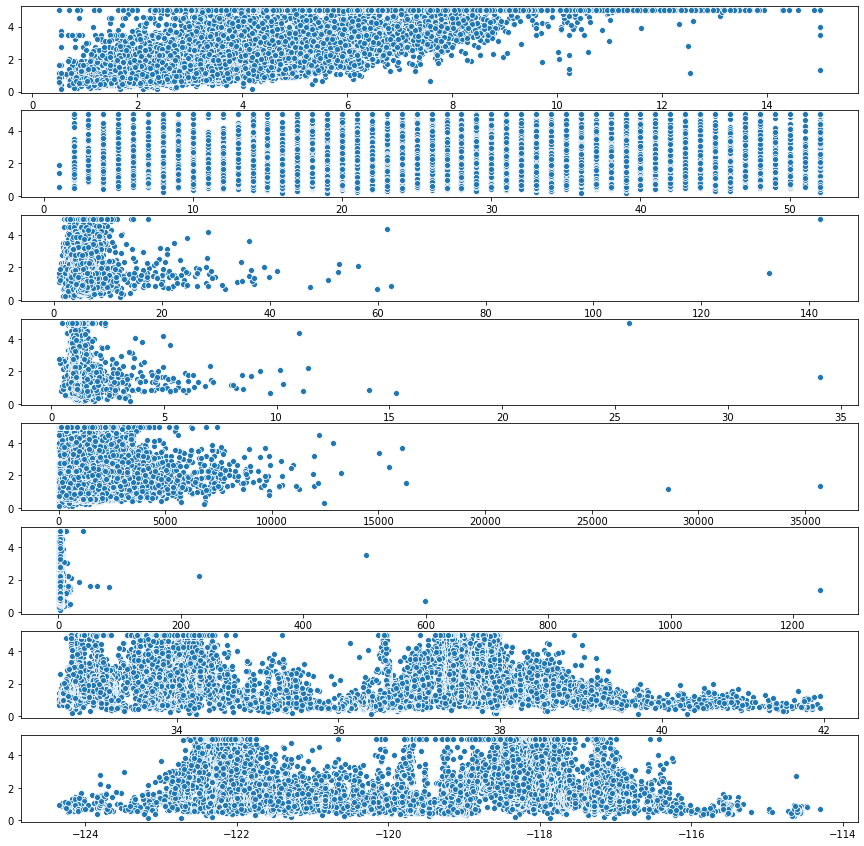

In [18]:
from seaborn import scatterplot

# make scatterplots of all predictors with the label
fig, axes = plt.subplots(ncols=1, nrows=n_features, figsize=(15,15))

for i, ax in zip(range(n_features), axes.flat): 
    scatterplot(x=X_full[:,i], y=y_full, ax=ax)
    
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.20, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])

16512
4128


In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data

X_train_norm = np.empty(X_train.shape)
X_test_norm = np.empty(X_test.shape)
for i in range(n_features):
    mean = np.mean(X_train[:,i])
    std = np.std(X_train[:,i])
    X_train_norm[:,i] = [(x - mean)/std for x in X_train[:,i]] #(X_train[:,1] - mean)/std
    X_test_norm[:,i] =  [(x - mean)/std for x in X_test[:,i]] #(X_test[:,1] - mean)/std

In [30]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_norm)
X_test_poly = poly.fit_transform(X_test_norm)

In [22]:
!pip install fracridge

In [23]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
model = FracRidgeRegressorCV()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print("Best Fraction: {}".format(model.best_frac_))
print("MSE: {}".format(mse))
print("R2: {}".format(r2))

Best Fraction: 1.0
MSE: 0.6294468701967473
R2: 0.5196561679226891


In [33]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 

model_norm = FracRidgeRegressorCV()
model_norm.fit(X_train_norm, y_train)
y_predict_norm = model_norm.predict(X_test_norm)
mse_norm = mean_squared_error(y_test, y_predict_norm)
r2_norm = r2_score(y_test, y_predict_norm)
print("Best Fraction: {}".format(model_norm.best_frac_))
print("MSE: {}".format(mse_norm))
print("R2: {}".format(r2_norm))

Best Fraction: 1.0
MSE: 4.863273551280762
R2: -2.7112639122858018


In [34]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 

model_poly = FracRidgeRegressorCV()
model_poly.fit(X_train_poly, y_train)
y_predict_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_predict_poly)
r2_poly = r2_score(y_test, y_predict_poly)
print("Best Fraction: {}".format(model_poly.best_frac_))
print("MSE: {}".format(mse_poly))
print("R2: {}".format(r2_poly))

Best Fraction: 0.6
MSE: 0.5536385613854712
R2: 0.5775070450687245


In [27]:
from seaborn import regplot

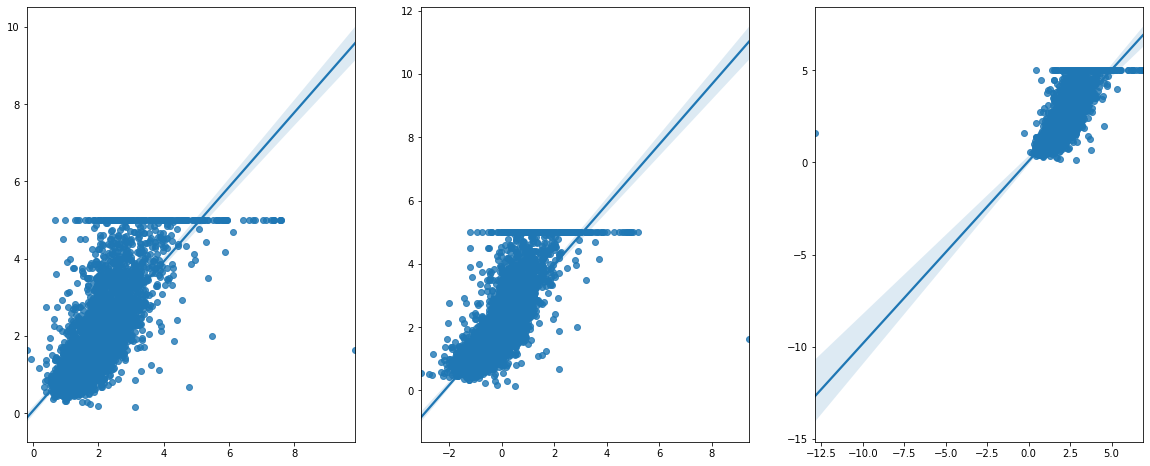

In [37]:
# report a binned regplot of the true outcome versus predictions in the test set
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,8))

regplot(x=y_predict, y=y_test, ax=ax[0])
regplot(x=y_predict_norm, y=y_test, ax=ax[1])
regplot(x=y_predict_poly, y=y_test, ax=ax[2])